<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/boston.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 무작정 코딩을 진행해봅니다.
- Boston 데이터를 대상으로 모델링해서 집값을 예측해 봅니다.
- LinearRegression 알고리즘을 사용합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [3]:
# 상위 몇 개 행 확인
data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


**데이터 설명**

- crim: 자치시(Town)별 1인당 범죄율
- zn: 25,000 평방피트를 초과하는 거주지역 비율
- indus: 비소매상업지역이 점유하고 있는 토지 비율
- chas: 찰스강에 대한 더미 변수 (= 1 강 경계에 위치; 0 나머지)
- nox: 10ppm당 농축 일산화질소
- rm: 주택 1가구당 평균 방 개수
- age: 1940년 이전에 건축된 소유주택 비율
- dis: 5개 보스턴 직업센터까지 접근성 지수
- rad: 방사형 도로까지의 접근성 지수
- tax: 10,000달러 당 재산세율
- ptratio: 자치시(Town)별 학생/교사 비율
- black: 1000(Bk - 0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 의미
- lstat: 모집단 하위 계층의 비율(%)
- medv: 본인 소유 주택가격(중앙값) (단위:$1,000)

In [4]:
# 하위 몇 개 행 확인
data.tail(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
# 기술통계 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [9]:
# 상관관계 확인
data.corr(numeric_only=True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

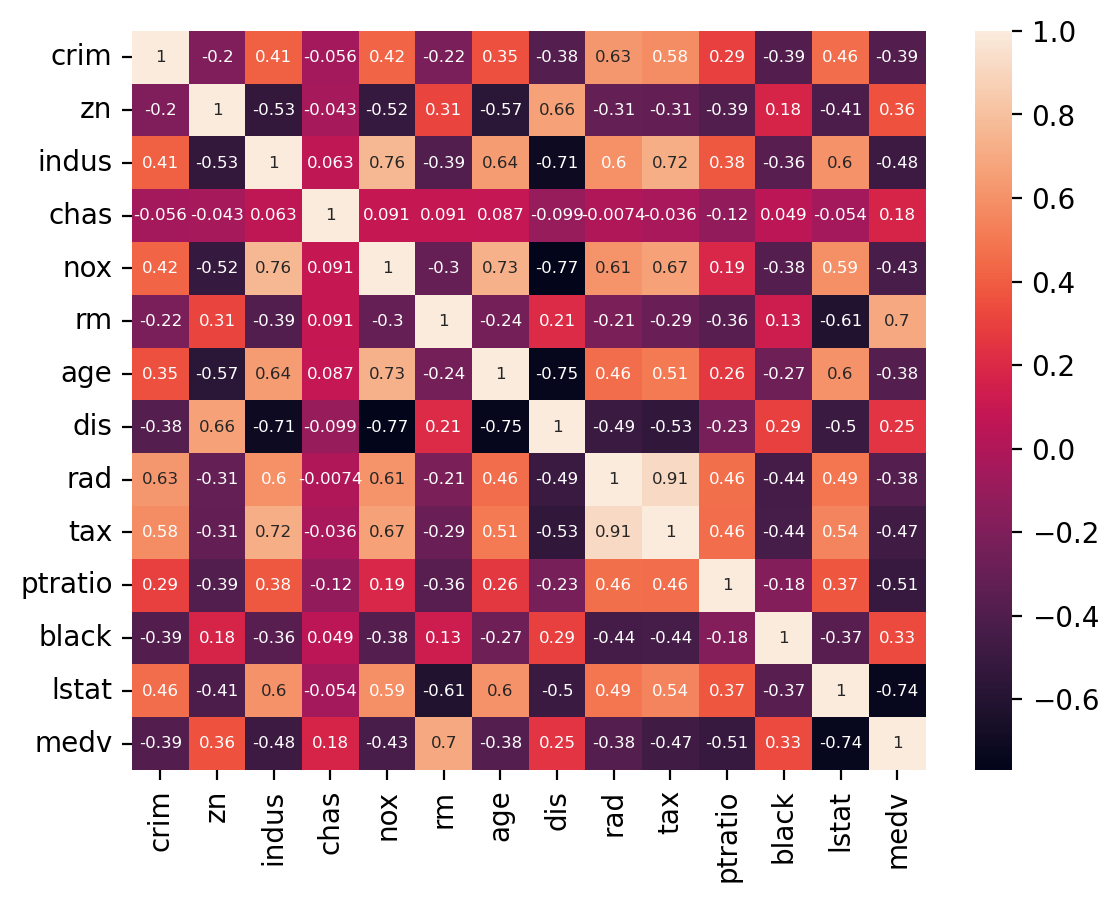

In [16]:
sns.heatmap(data.corr(numeric_only=True),
           annot = True,
           annot_kws={'size':6})


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [20]:
# target 확인
target = 'medv'

# 데이터 분리
X = data.drop(target, axis=1)
y = data.loc[:,target]

In [22]:
print(X.shape, y.shape)

(506, 13) (506,)


**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [28]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

**1) 모델링**

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘과 평가 방법을 사용합니다.
    - 알고리즘: LinearRegression
    - 평가방법: mean_absolute_error

In [30]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [31]:
# 2단계: 선언하기
model = LinearRegression()

In [32]:
# 3단계: 학습하기
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# 4단계: 예측하기
y_pred = model.predict(X_test)

In [34]:
# 5단계: 평가하기
print('MAE :', mean_absolute_error(y_test, y_pred))

# 차이의 평균이 3.4 이다.

MAE : 3.4210072413077515


**2) 예측값과 실젯값 시각화 비교**

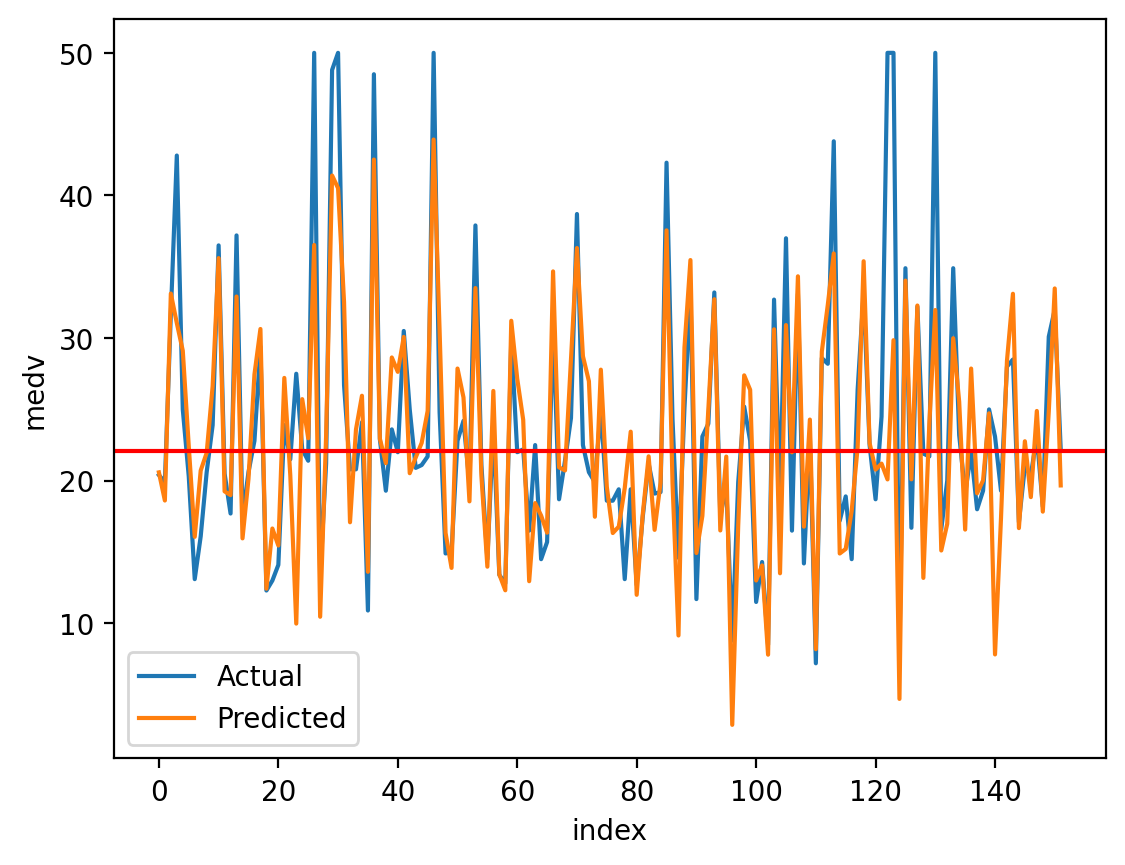

In [43]:
# 예측값과 실젯값 시각화 비교
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_train.mean(), color='red')
plt.xlabel('index')
plt.ylabel('medv')
plt.show()


In [42]:
print(y_test.values[:10])
print(y_pred[:10])

[20.4 19.9 31.7 42.8 25.  20.3 13.1 16.1 20.6 23.9]
[20.58640903 18.61289703 33.12274345 31.05492414 29.11551636 22.42699275
 16.06727916 20.71460961 21.95182197 26.63434098]
